# Classification model: Logisitic Regression 
---

## Problem setting
Find the relationship between the features of a data point and it's corresponding class label. For binary logistic regression we only have 2 class labels, such as pass/fail, win/lose, alive/dead, healthy/sick, 0/1 etc. So given the features of a data point, the binary logistic regression model should output/predict a probability value, for this point belonging to class 0 or 1.

## Dataset:

$D=\{(\mathbf x_{1}, y_{1}), ..., (\mathbf x_{N}, y_{N})\}$, so $D\epsilon \mathbb{R}^{N,d+1}$.

where $\mathbf{x}\epsilon \mathbb{R}^{d,1}, y_{i}\epsilon \{0,1\}$, with ***d*** independent features.

| feature 1  | ...  | feature d  | label  |
|---|---|---|---|
| xyz  | ...  | ...  | 0  |
| ...  | ...  | ...  |  ... |
| idk  | ...  | ...  |  1 |

## Visualizing a trained model
For a dataset with 2 features $x_1,x_2$, the trained model can be represented as a decision boundary that looks something like this
![](resources/boundary.png)
where all points that fall left of it will be predicted as class 0, and all points that fall right of it will be classified as class 1.

![](resources/dataset.png)
![](resources/line.png)
Example: 

Feature 1 = Pointy ears, Feature 2 = Fluffiness

## Binary logistic regression model
---

The ***model***: $\hat{y_{i}} = \sigma(w_0+w_1 x^{1}_i+...+w_d x^{d}_i) = \sigma(\mathbf{w^Tx_{i}})$

$\hat{y_{i}}$: predicted class for data point $\mathbf x_{i}$

$\mathbf x_i = \begin{bmatrix} 1 \\ x^{1}_i  \\ ... \\ x^{d}_i \end{bmatrix}$: feature vector of data point $i$, $x^{j}_{i}$: feature $j$ of training data point $i$ - ***given***

$w_0$: bias value (intercept/offset on y-axis) - ***trainable***

$\mathbf w = \begin{bmatrix} w_0 \\ w_1  \\ ... \\ w_{d} \end{bmatrix}$: weight vector - ***trainable***, $w_{j}$: weight value for feature $x^{j}$ - ***trainable***
#### Note: Exactly the same as linear regression but, with an additional function $\sigma()$ that gets applied to $\mathbf{w^Tx_{i}}$. 

## The sigmoid function
---
$\sigma:\mathbb{R}\rightarrow ] 0,1 [$,

$\sigma(x)=\frac{1}{1+e^{-x}}=\frac{e^x}{1+e^{x}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

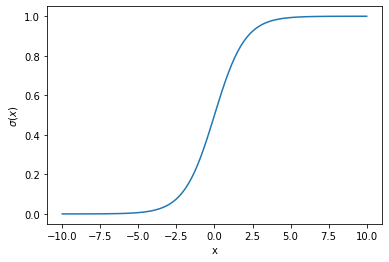

In [2]:
x = np.linspace(-10,10,100)

sigmoid = 1 / (np.exp(-x)+1)

plt.plot(x, sigmoid)
plt.xlabel("x")
plt.ylabel("$\sigma(x)$")
plt.show()

#### Properties of the sigmoid function
- Squeezes the inputs x into a kind of probability density function:
    - We interpret the output of the function as the probability p of input x belonging to class 1.
    - The probability of input x belonging to class 0 is 1-p.
- Differentiable at each point, with high gradients around the 0 point and low gradients on the left/right tails.

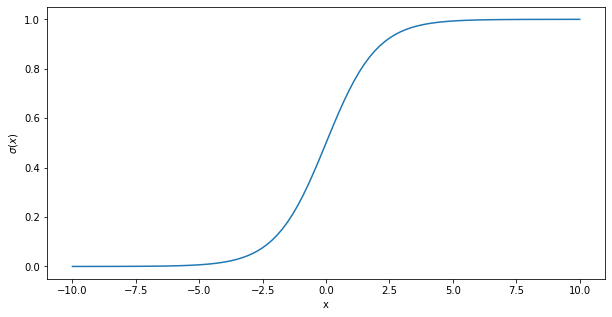

In [3]:
plt.figure(figsize=(10,5))
plt.plot(x, sigmoid)
plt.xlabel("x")
plt.ylabel("$\sigma(x)$")
plt.show()

In [4]:
# example 1
x1 = -5
prediction1 = 1/(np.exp(-x1)+1) # <- Probability of x1 belonging to class 1 is ~0.7% -> probability for class 0 is ~99.3%

# example 2
x2 = 0 
prediction2 = 1/(np.exp(-x2)+1) # <- Probability of x1 belonging to class 1 is 50% -> probability for class 0 is 50%
 
# example 3
x3 = 7.5
prediction3 = 1/(np.exp(-x3)+1) # <- Probability of x1 belonging to class 1 is ~99.94% -> probability for class 0 is ~0.06%
print(prediction1), print(prediction2), print(prediction3);

0.0066928509242848554
0.5
0.9994472213630764


### Graphical model of logistic regression
![](resources/lr.png)

# Loss function for Logistic Regression

## $\Rightarrow$ Binary cross-entropy loss

### Loss surface for one data point $\mathbf{x_i}$ with true label $y_i=1$.
$J(\mathbf w) = -y_{i}\ log(\hat{y_{i}})-(1-y_{i})\ log(1-\hat{y_{i}}) = -log(\hat{y_{i}})$, where $\hat{y}_{i}= \sigma(\mathbf{w}^T\mathbf{x_i})$.

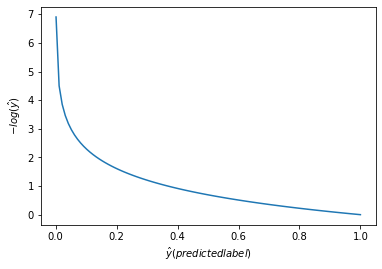

In [6]:
y_hat = np.linspace(0.001,1,100)
loss = -np.log(y_hat)

fig = plt.figure()
plt.plot(y_hat, loss)
plt.xlabel('$\hat{y}(predicted label)$')
plt.ylabel('$-log(\hat{y})$')
plt.show()

### Loss surface for one data point $\mathbf{x_i}$ with true label $y_i=0$.
$J(\mathbf w) = -y_{i}\ log(\hat{y_{i}})-(1-y_{i})\ log(1-\hat{y_{i}}) = -log(1-\hat{y_{i}})$, where $\hat{y}_{i}= \sigma(\mathbf{w}^T\mathbf{x_i})$.

<ipython-input-7-52e936432c44>:2: RuntimeWarning: divide by zero encountered in log
  loss = -np.log(1-y_hat)


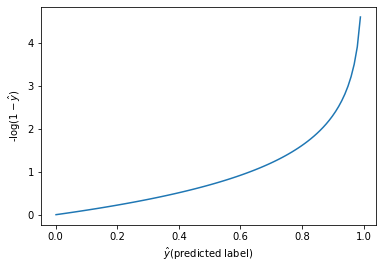

In [7]:
y_hat = np.linspace(0.001,1,100)
loss = -np.log(1-y_hat)

fig = plt.figure()
plt.plot(y_hat, loss)
plt.xlabel('$\hat{y}$(predicted label)')
plt.ylabel('-log($1-\hat{y}$)')
plt.show();

## The loss function: Binary cross-entropy

Scalar form:
$J(\mathbf w) = -\frac{1}{N}(\sum_{i=1}^{N}y_{i}\ log(\hat{y_{i}})+(1-y_{i})\ log(1-\hat{y_{i}}))$, with $\hat{y}_i=\sigma(\mathbf w^T \mathbf x_i)$.

Vectorized form:
$J(\mathbf w) = -\frac{1}{N}sum( \mathbf ylog(\hat{\mathbf y})+(1-\mathbf y)\ log(1-\hat{\mathbf y}))$, 

with 
$\mathbf{\hat{y}}= \begin{bmatrix} \hat{y}_1  \\ ... \\ \hat{y}_N \end{bmatrix}$.

# Optimizing loss function

### Binary cross entropy loss is convex, but there is NO closed form solution to find the optimal parameter vector.

## $\rightarrow$ Apply gradient descent!

### Recap Gradient Descent:
1. Start with random weight vector $\mathbf w^1$

2. Update $\mathbf w^t$, according to the learning rule: 

&emsp; &emsp; &emsp; $\mathbf w^{t+1}=\mathbf w^{t}-\alpha\nabla_{\mathbf w}J(\mathbf w^t)$

3. Repeat step 2 until convergence (e.g. n-epochs)

### Computing the gradient:
$\nabla_{\mathbf w} J(\mathbf w) = \nabla_{\mathbf w}-\frac{1}{N}\sum_{i=1}^{N}y_{i}\ log(\hat{y_{i}})+(1-y_{i})\ log(1-\hat{y_{i}})$

$=\nabla_{\mathbf w}-\frac{1}{N}\sum_{i=1}^{N}y_{i}\ log(\sigma(\mathbf w^T\mathbf x_i))+(1-y_{i})\ log(1-\mathbf w^T\mathbf x_i)$

$=\frac{1}{m}\mathbf X^T(\sigma(\mathbf X \mathbf w)-\mathbf y)$,


where $\mathbf w\epsilon\mathbb{R}^{d,1}, \mathbf X\epsilon\mathbb{R}^{N,d}, \mathbf y\epsilon\mathbb{R}^{N,1}, \nabla_{\mathbf w} J(\mathbf w) \epsilon \mathbb{R}^{d,1}$.

# Extending Binary Classification to Multi-class Classification

## Essentially there are two strategies for extending binary logistic regression to multi-class logistic regression:
#### Problem setting:
---
Imagine we want to train a logistic regression classifier to distinguish data points from $K$ different classes. This is usually refered to as a $K$-way multiclass problem.

### 1. One-vs.-rest classification: 
This strategy involves training a single classifier per class(***K*** classifiers in total), with the samples of that class as positive samples and all other samples as negatives. Making decisions means applying all classifiers to an unseen sample $\mathbf x_i$ and predicting the label k for which the corresponding classifier reports the highest probability score.

![ovr](resources/onevsr.png)

### 2. One-vs.-one classification
This strategy involves training $K(K-1)/2$ binary classifiers, each receives the samples of a pair of classes from the original training data set and must learn to distinguish these two classes. At prediction time each classifier makes a prediction on the unseen data point $x_i$ and the class that got the highest number of "+1" predictions gets predicted by the ensemble of classifiers.

<img src="resources/ovo.png" width="1200"/>

### Note: The typical packages that we use to apply classification models already have these strategies implemented for you.

# Train a Logistic Regressor using SkLearn on the Wine Data Set
https://archive.ics.uci.edu/ml/datasets/wine

## Workflow-Template:
0. Do the imports
1. Load and explore the data
2. Preprocess the data
3. Define and implement the model
4. Train the model
5. Evaluate the model

# 0. Do the imports

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# 1. Load and explore the data

In [11]:
X, Y = load_wine(return_X_y=True)
X.shape, Y.shape

((178, 13), (178,))

In [12]:
np.unique(Y) 

array([0, 1, 2])

# 2. Preprocess the data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
X_test.shape, Y_test.shape  

((36, 13), (36,))

# 3. Choose and implement the model

In [15]:
logistic_regressor = LogisticRegression(max_iter=200)

In [16]:
logistic_regressor

LogisticRegression(max_iter=200)

In [17]:
logistic_regressor.coef_

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

# 4. Train the model

In [ ]:
logistic_regressor.fit(X_train, Y_train)

In [ ]:
logistic_regressor.coef_.shape

In [ ]:
logistic_regressor.intercept_

# 5. Evaluate the model

### Mean accuracy as one evaluation method:

$accuracy = \frac{\text{number of correctly classified data points}}{\text{total number of data points}}$


In [ ]:
# Classification accuracy on the training dataset 
logistic_regressor.score(X_train, Y_train)

In [ ]:
# Classification accuracy on the test dataset
logistic_regressor.score(X_test, Y_test)

# We are going to learn about more evaluation methods soon